In [16]:
import torch
import sys
from os import listdir, path
import random

# sys.path.insert(0, '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version')
sys.path.insert(0, '/home/steve/Dokumenty/Studia/project/CSGNet')

# from ucsgnet.dataset import CADDataset
import matplotlib.pyplot as plt
from src.Models.models import ParseModelOutput

from src.utils.train_utils import prepare_input_op, beams_parser, validity, image_from_expressions

In [17]:
canvas_shape = [64, 64]
max_len = 13
terminals_path = '/home/steve/Dokumenty/Studia/project/CSGNet/terminals.txt'
data_path = '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic'
output_path= '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/'
filepaths = {
    k: path.join(path.join(data_path, k), 'expressions.txt') for k in listdir(data_path)
}

with open(terminals_path, "r") as file:
    unique_draw = file.readlines()
for index, e in enumerate(unique_draw):
    unique_draw[index] = e[0:-1]

parser = ParseModelOutput(unique_draw, max_len // 2 + 1, max_len, canvas_shape)
filepaths

{'five_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/five_ops/expressions.txt',
 'two_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/two_ops/expressions.txt',
 'three_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/three_ops/expressions.txt',
 'four_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/four_ops/expressions.txt',
 'six_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/six_ops/expressions.txt',
 'one_op': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/one_op/expressions.txt',
 'seven_ops': '/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/synthetic/synthetic/seven_ops/expressions.txt'}

In [29]:
def create_images(expressions, parser, output_name, show=True, save=True):
    predicted_images = image_from_expressions(parser, expressions)
    for i, img in enumerate(predicted_images):
        plt.imshow(img, cmap="Greys")
        plt.grid("off")
        plt.axis("off")
        if save:
            plt.savefig(path.join(output_path, f'{output_name}_{i}'))
#     if show:
#         plt.imshow(random.sample(list(predicted_images), 1), cmap="Greys")
#         plt.grid("off")
#         plt.axis("off")
#         plt.show()

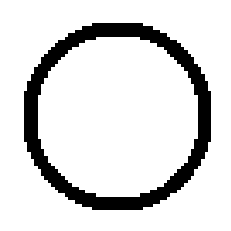

In [30]:
# Fill the expressions that you want to render
samples = ["c(32,32,28)c(32,32,24)-s(32,32,28)s(32,32,20)-+t(32,32,20)+", "c(32,32,28)c(32,32,24)-"]
create_images(samples, parser, 'sample')

In [5]:
# model_path='/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/models/csgnet/mix_len_cr_percent_equal_batch_3_13_prop_100_hdsz_2048_batch_2000_optim_adam_lr_0.001_wd_0.0_enocoderdrop_0.0_drop_0.2_step_mix_mode_12.pth'
# cad_data_path='/home/steve/Dokumenty/Studia/project/ucsgnet-students-version/data/cad/cad.h5'

In [6]:
# dataset = CADDataset(data_path, 'train')

In [ ]:
# def create_empty_model():
#     config = {
        
#     }
#     # CNN encoder
#     encoder_net = Encoder(0.2)
# #     encoder_net.cuda()

#     # Load the terminals symbols of the grammar
#     with open("terminals.txt", "r") as file:
#         unique_draw = file.readlines()
#     for index, e in enumerate(unique_draw):
#         unique_draw[index] = e[0:-1]

#     # RNN decoder
#     imitate_net = ImitateJoint(
#         hd_sz=2048,
#         input_size=2048,
#         encoder=encoder_net,
#         mode=2,
#         num_draws=len(unique_draw),
#         canvas_shape=config.canvas_shape)
# #     imitate_net.cuda()
#     imitate_net.epsilon = config.eps

In [8]:
# csg_model=torch.load(model_path, map_location=torch.device('cpu'))

odict_keys(['encoder.conv1.weight', 'encoder.conv1.bias', 'encoder.conv2.weight', 'encoder.conv2.bias', 'encoder.conv3.weight', 'encoder.conv3.bias', 'encoder.conv4.weight', 'encoder.conv4.bias', 'encoder.batch_norm_1.weight', 'encoder.batch_norm_1.bias', 'encoder.batch_norm_1.running_mean', 'encoder.batch_norm_1.running_var', 'encoder.batch_norm_2.weight', 'encoder.batch_norm_2.bias', 'encoder.batch_norm_2.running_mean', 'encoder.batch_norm_2.running_var', 'encoder.batch_norm_3.weight', 'encoder.batch_norm_3.bias', 'encoder.batch_norm_3.running_mean', 'encoder.batch_norm_3.running_var', 'dense_input_op.weight', 'dense_input_op.bias', 'rnn.weight_ih_l0', 'rnn.weight_hh_l0', 'rnn.bias_ih_l0', 'rnn.bias_hh_l0', 'dense_output.weight', 'dense_output.bias', 'dense_fc_1.weight', 'dense_fc_1.bias', 'batchnorm_fc_1.running_mean', 'batchnorm_fc_1.running_var'])